In [1]:
# FRAUD CHECK

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.metrics import *
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv("Fraud_check (1).csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data["Tax_Income"] = ["Risky" if i  <= 30000 else "Good" for i in data["Taxable.Income"] ]

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [6]:
data.drop("Taxable.Income",axis=1,inplace=True)

In [7]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [8]:
data.shape

(600, 6)

In [9]:
data.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Tax_Income         0
dtype: int64

In [10]:
data.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


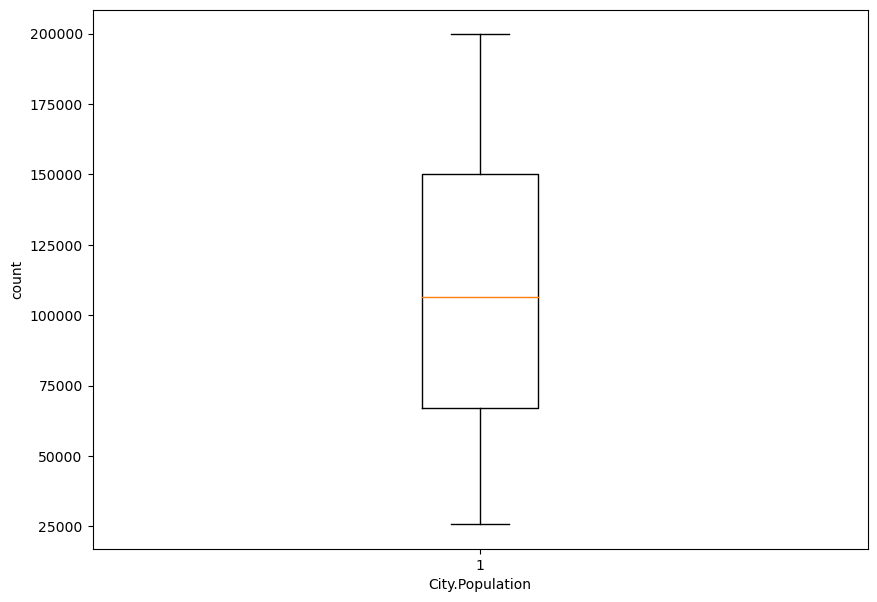

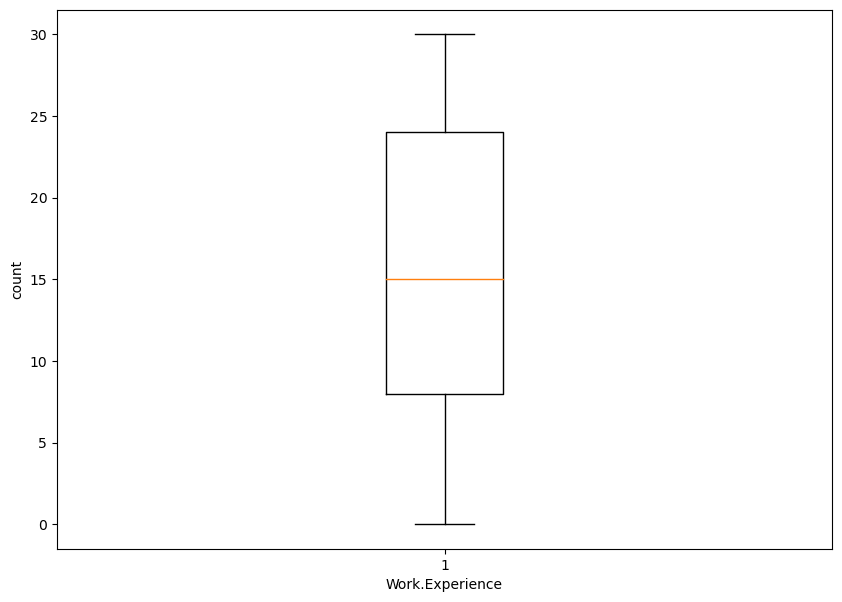

In [11]:
columns = list(data.columns)

for i in columns:
    if data[i].dtypes==object:
        pass
    else:
        plt.figure(figsize=(10,7))
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()    

In [12]:
# There are no outliers in the numeric columns
data.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Tax_Income'],
      dtype='object')

In [13]:
label_encoder = preprocessing.LabelEncoder()
data["Tax_Income"]= label_encoder.fit_transform(data['Tax_Income'])

In [14]:
data["Tax_Income"].value_counts()  # Imbalanced data : we will be moving with f1 score

0    476
1    124
Name: Tax_Income, dtype: int64

In [15]:
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [17]:
# As we have categorical datatypes we should first encode them to numerical

In [18]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.20 , random_state = 10)

In [19]:
label_encoders = {}
for i in ['Undergrad', 'Marital.Status', 'Urban']:
    label_encoders[i] = preprocessing.LabelEncoder()
    x_train[i] = label_encoders[i].fit_transform(x_train[i])
    x_test[i] = label_encoders[i].transform(x_test[i])

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 284 to 265
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        480 non-null    int32
 1   Marital.Status   480 non-null    int32
 2   City.Population  480 non-null    int64
 3   Work.Experience  480 non-null    int64
 4   Urban            480 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 16.9 KB


In [21]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 69 to 339
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        120 non-null    int32
 1   Marital.Status   120 non-null    int32
 2   City.Population  120 non-null    int64
 3   Work.Experience  120 non-null    int64
 4   Urban            120 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 4.2 KB


# IMPLEMENTING RF AND DTC TO DECIDE THE BEST DECISION TREE ALONG WITH BAGGING

In [22]:
models = [DecisionTreeClassifier(),
          BaggingClassifier(n_estimators=200 , max_samples= 0.8),
        RandomForestClassifier(n_estimators=200, max_samples=0.8, max_features= 4)]

In [23]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("*************"*10)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        94
           1       0.17      0.19      0.18        26

    accuracy                           0.62       120
   macro avg       0.47      0.46      0.46       120
weighted avg       0.64      0.62      0.63       120

BaggingClassifier(max_samples=0.8, n_estimators=200)
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        94
           1       0.12      0.04      0.06        26

    accuracy                           0.73       120
   macro avg       0.45      0.48      0.45       120
weighted avg       0.64      0.73      0.67       120

Random

In [42]:
confusion_matrix(y_test,pred)

array([[86,  8],
       [26,  0]], dtype=int64)

In [ ]:
''' THE DATA IS IMBALANCED , TRYING TO ALTER THE VALUES OF N_ESTIMATORS AND MAX_FAETURES

In [26]:
models = [DecisionTreeClassifier(),
          BaggingClassifier(n_estimators=300 , max_samples= 0.85),
        RandomForestClassifier(n_estimators=300, max_samples=0.85, max_features= 4)]

In [27]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("*************"*10)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        94
           1       0.15      0.15      0.15        26

    accuracy                           0.62       120
   macro avg       0.46      0.45      0.46       120
weighted avg       0.63      0.62      0.63       120

BaggingClassifier(max_samples=0.85, n_estimators=300)
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        94
           1       0.00      0.00      0.00        26

    accuracy                           0.72       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.65       120

Rando

In [28]:
models = [DecisionTreeClassifier(),
          BaggingClassifier(n_estimators=250 , max_samples= 0.70),
        RandomForestClassifier(n_estimators=250, max_samples=0.70, max_features= 4)]

In [29]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("*************"*10)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        94
           1       0.21      0.23      0.22        26

    accuracy                           0.65       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.66      0.65      0.65       120

BaggingClassifier(max_samples=0.7, n_estimators=250)
**********************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120

Random

In [ ]:
'''The above model provides a weighted average of 76% for recall using RANDOM FOREST.

as in fraud check : Recall is crucial when ensuring that no fraudulent transactions go undetected is a
top priority. False negatives in a fraud detection system represent actual fraud cases that were missed by the model.
High recall means that the model is effective at capturing most fraud cases. 